IMPORT THE LIBRARIES

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesRegressor
from sklearn.metrics import accuracy_score, classification_report,silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

IMPORT THE DATASET

In [55]:
data = pd.read_csv("/home/apiiit123/Downloads/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


EXPLORATORY DATA ANALYSIS (STARTS HERE)

In [56]:
#THE LESS RELATED OR NOT RELATED COLUMNS WILL BE REMOVED FROM THE DATASET
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [57]:
#THE FIRST 5 COLUMNS AND ROWS OF DATA WILL BE DISPLAYED FOR DATA ANALYSIS
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [59]:
#TO KNOW THE INFO OF DATASET AND TYPES AND ALL
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [60]:
#TO KNOW THE STATSTICAL MEASURES OF THE DATA 
data.describe

<bound method NDFrame.describe of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMemb

In [61]:
#SHAPE OF THE DATASET
data.shape

(10000, 11)

In [62]:
#NUMERICAL AND CATEGORICAL LIST OF COLUMNS WILL BE DISPLAYED..IF THEY WILL BE USED FOR ENCODING OR NOT
numerical = data.select_dtypes(include = ["int","float"]).columns.tolist()
categorical = data.select_dtypes(include = ["object"]).columns.tolist()
print(numerical)
print(categorical)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
['Geography', 'Gender']


In [63]:
#TO FIND OUT THE NULL VALUES IN THE DATA..IF PRESENT WE CAN FILL IT WITH EITHER SIMPLE IMPUTER METHODUSING MEAN,MEDIAN ETC.. OR REMOVE THE COLUMNS
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [64]:
#We convert columns to the category type to optimize memory usage and improve processing efficiency when dealing with categorical variables.
data['Geography'] = data['Geography'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Exited'] = data['Exited'].astype('category')

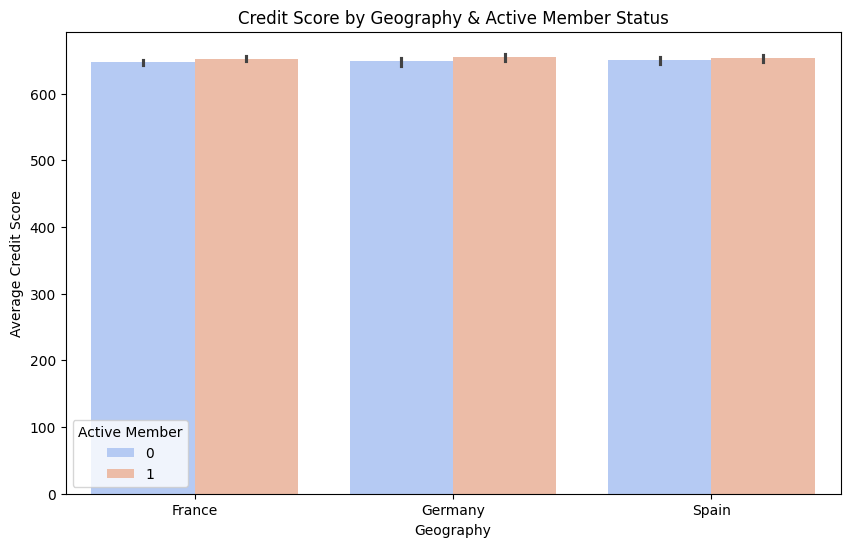

In [65]:
#active member or not based on credit score and geography
plt.figure(figsize=(10, 6))
sns.barplot(x="Geography", y="CreditScore", hue="IsActiveMember", data=data, palette="coolwarm")
plt.title("Credit Score by Geography & Active Member Status")
plt.ylabel("Average Credit Score")
plt.xlabel("Geography")
plt.legend(title="Active Member")
plt.show()

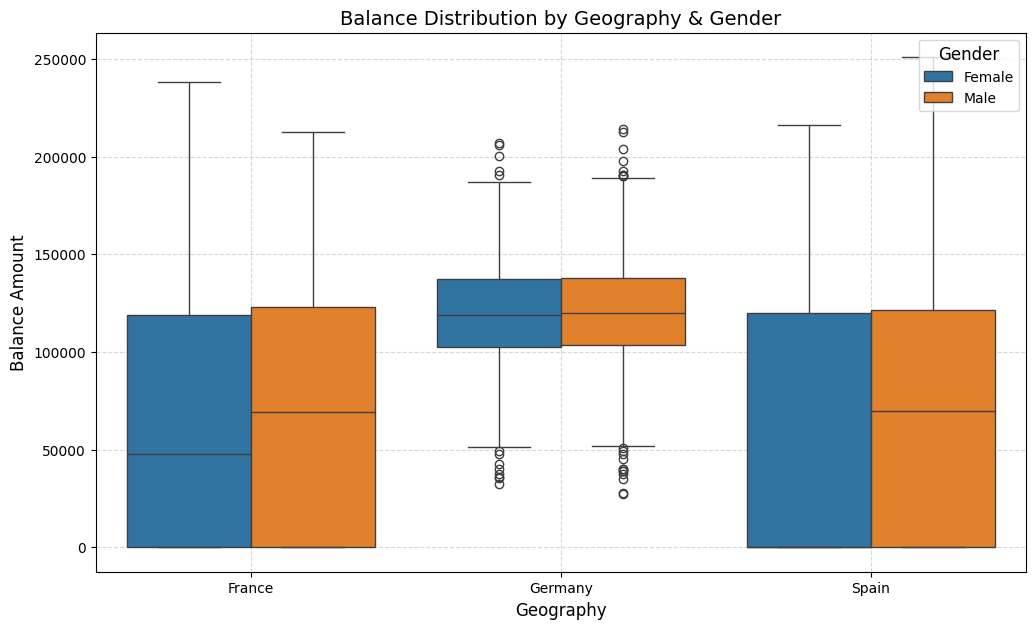

In [66]:
# Visualization: Balance Distribution by Geography & Gender
plt.figure(figsize=(12, 7))
sns.boxplot(x="Geography", y="Balance", hue="Gender", data=data)
plt.title("Balance Distribution by Geography & Gender", fontsize=14)
plt.ylabel("Balance Amount", fontsize=12)
plt.xlabel("Geography", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Gender", fontsize=10, title_fontsize=12, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

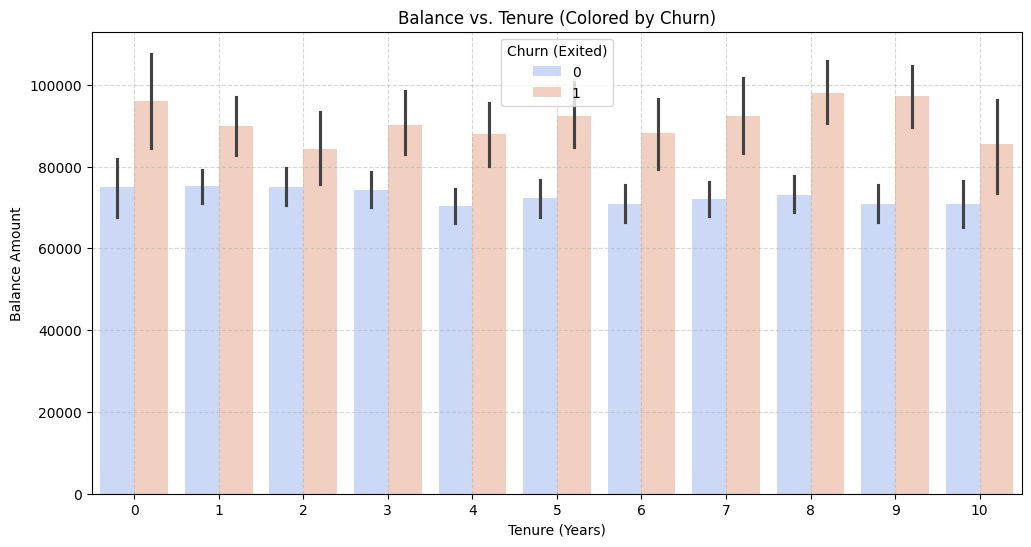

In [67]:
# Visualization: Balance vs. Tenure (Colored by Churn)
plt.figure(figsize=(12, 6))
sns.barplot(x="Tenure", y="Balance", hue="Exited", data=data, palette="coolwarm", alpha=0.7)
plt.title("Balance vs. Tenure (Colored by Churn)")
plt.xlabel("Tenure (Years)")
plt.ylabel("Balance Amount")
plt.legend(title="Churn (Exited)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

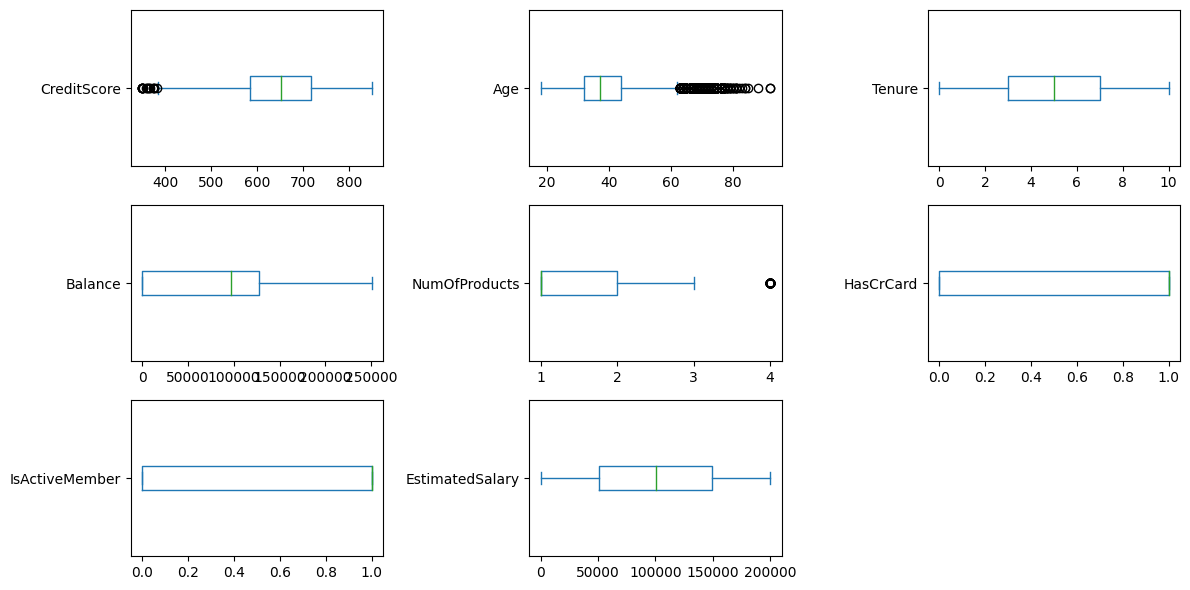

In [68]:
#here all the numerical features are checking for the outliers to remove outliers from data
data[numerical].plot(kind='box', figsize=(12, 6), vert=False, subplots=True, layout=(3, 3), sharex=False)
plt.tight_layout()
plt.show()

In [69]:
#to remove outliers we are use IQR by setting up lower and upperbounds here
def remove_outliers(df):
    numerical_cols = df.select_dtypes(include=["int", "float"]).columns  
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only values within the bounds
    data_cleaned = data[~((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)]
    return data_cleaned

In [70]:
cleaned_data = remove_outliers(data)
cleaned_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


FEATURE ENGINEERING

In [71]:
# Convert categorical variables into dummy/one-hot encoded variables, dropping the first category to avoid multicollinearity  
data = pd.get_dummies(data, drop_first=True)

In [72]:
# Categorize 'Age' into groups and create one-hot encoded dummy variables (dropping the first category)  
#this will helps to find out which age group will be the most percent creating churn
data['AgeGroup'] = pd.cut(data['Age'], bins=[18, 30, 50, 100], labels=['Young', 'Middle_Aged', 'Senior'])
data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

In [73]:
#creating a new column by using balance and estimated salary to get perfect ratio
data['BalanceToSalaryRatio'] = data['Balance'] / data['EstimatedSalary']

In [74]:
#converting credit category into one hot encoding but making it into bins for clusters
data['CreditCategory'] = pd.cut(data['CreditScore'], bins=[300, 600, 800, 900], labels=['Low', 'Medium', 'High'])
data = pd.get_dummies(data, columns=['CreditCategory'], drop_first=True)

In [75]:
#new columns were created here 
data['LongTermCustomer'] = data['Tenure'].apply(lambda x: 1 if x > 5 else 0)
data['ProductBalanceRatio'] = data['Balance'] / (data['NumOfProducts'] + 1) 
data['CreditAgeRatio'] = data['CreditScore'] / data['Age']

In [76]:
print(data.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Exited_1', 'AgeGroup_Middle_Aged',
       'AgeGroup_Senior', 'BalanceToSalaryRatio', 'CreditCategory_Medium',
       'CreditCategory_High', 'LongTermCustomer', 'ProductBalanceRatio',
       'CreditAgeRatio'],
      dtype='object')


SPLITTING THE DATA

In [77]:
#selecting feature and target variables for training the dataset
x = data.drop(columns=["Exited_1"], axis = 1)  # Feature variables
y = data["Exited_1"]#target variable

In [78]:
#using the kfold instead of traintest split for better model evaluation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [79]:
#parameters selection for random forest evaluation
param_grid= {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


CHOOSE A MODEL & TRAINING AND TESTING THE MODEL

In [80]:
#choosing this model because it can overcome the overfit and underfit and best for structured data 
random = RandomForestClassifier(random_state=42)

In [81]:
#this searching is used to find the perfect parameters and solution points for dataset 
grid_search = GridSearchCV(random, param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(x, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [82]:
#best parameters findout after searching
best_rf = grid_search.best_estimator_
print("Best RF Parameters:", grid_search.best_params_)

Best RF Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}


FEATURE IMPORTANCE

In [83]:
#to predict the feature importance we use extratrees regressor to evaluate feature importance as it leverages multiple decision trees for better stability  
etr = ExtraTreesRegressor(n_estimators=100, random_state=42)
etr.fit(x, y)

ExtraTreesRegressor(random_state=42)

In [84]:
feature_importances = etr.feature_importances_
features = x.columns

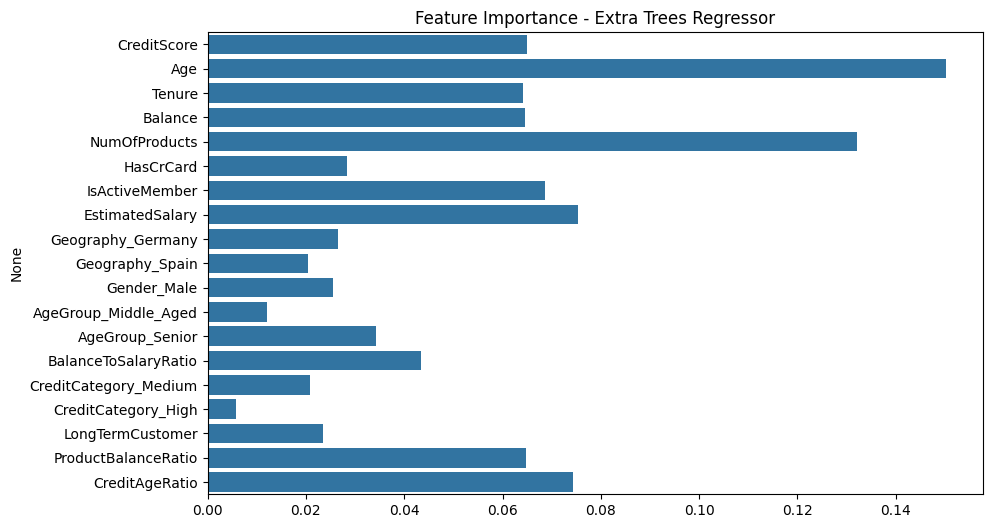

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance - Extra Trees Regressor")
plt.show()

PREDICT THE MODEL

In [86]:
y_pred = best_rf.predict(x)

EVALUATION OF A MODEL

In [87]:
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy: 0.9361
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.99      0.96      7963
        True       0.96      0.71      0.82      2037

    accuracy                           0.94     10000
   macro avg       0.95      0.85      0.89     10000
weighted avg       0.94      0.94      0.93     10000



TO VISUALIZE THE CHURN USING CLUSTERING TECHNIQUES AND THEIR PARAMAETERS LIKE SILHOUTTE SCORE

In [88]:
#Check best clustering method using Silhouette Score
silhouette_scores = {}

TO PREDICT KMEANS LABELS OF CLUSTERS AND PREDICT THE DATA 

In [89]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(x)
silhouette_scores["K-Means"] = silhouette_score(x, kmeans_labels)
data['Cluster'] = kmeans.fit_predict(x)

/home/apiiit123/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/apiiit123/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


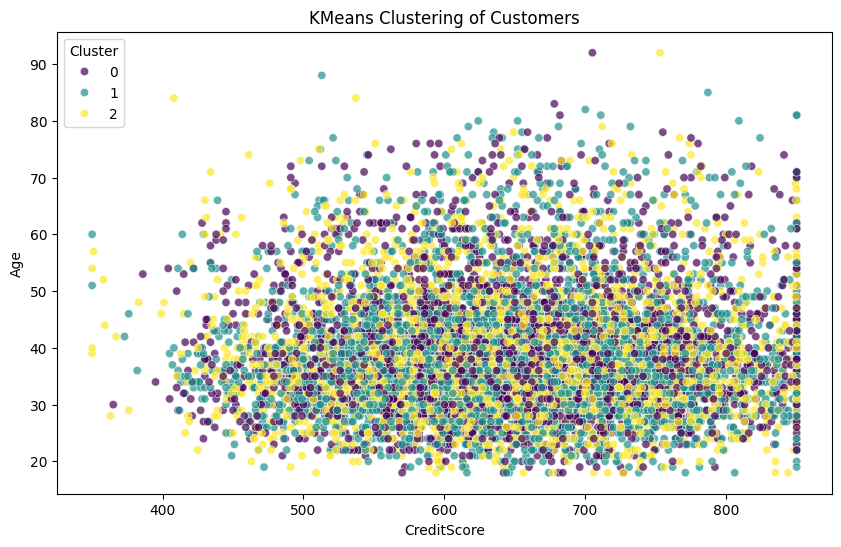

In [90]:
# visualize the  customers using Scatter Plot: KMeans Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=data['Cluster'], palette='viridis', alpha=0.7)
plt.title("KMeans Clustering of Customers")
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.legend(title="Cluster")

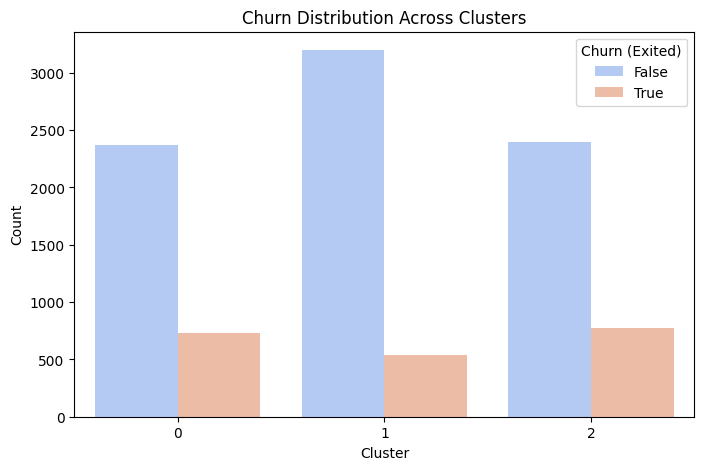

In [91]:
# visualize  Churn Count in Each Cluster
plt.figure(figsize=(8, 5))
sns.countplot(x=data['Cluster'], hue=y, palette='coolwarm')
plt.title("Churn Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Churn (Exited)")
plt.show()

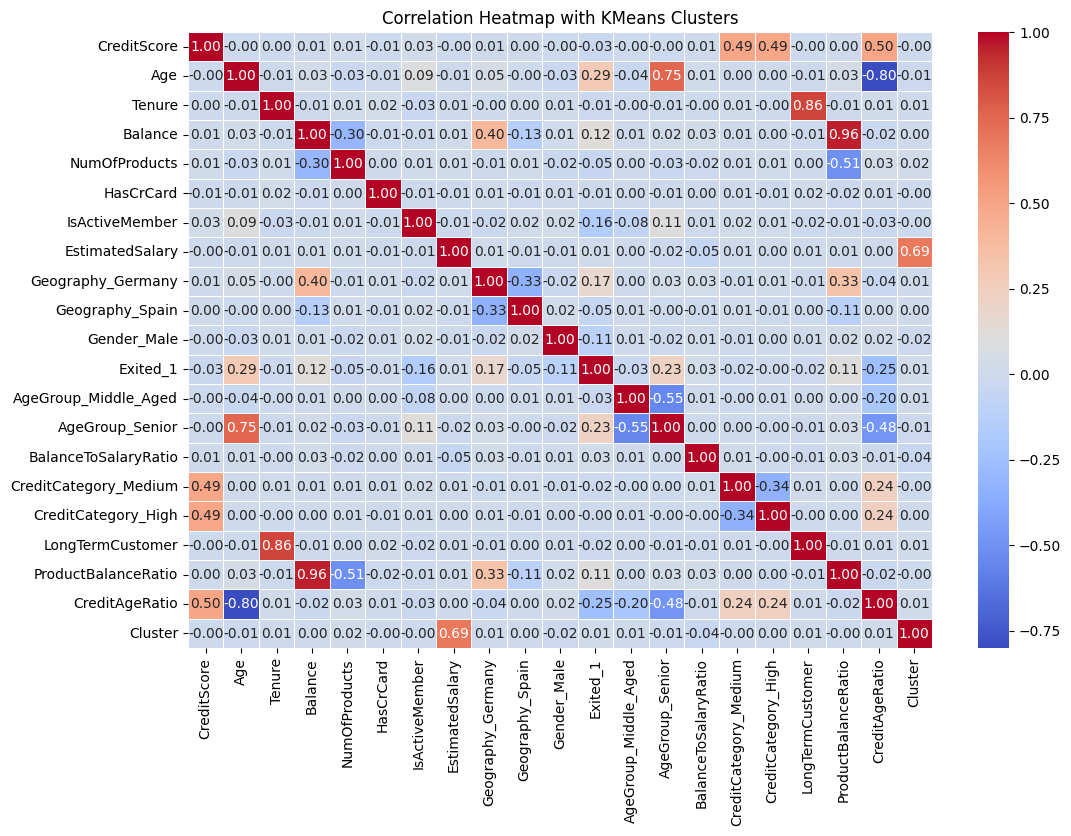

In [92]:
# Correlation Heatmap Including Clusters to get perfect estimation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with KMeans Clusters")
plt.show()

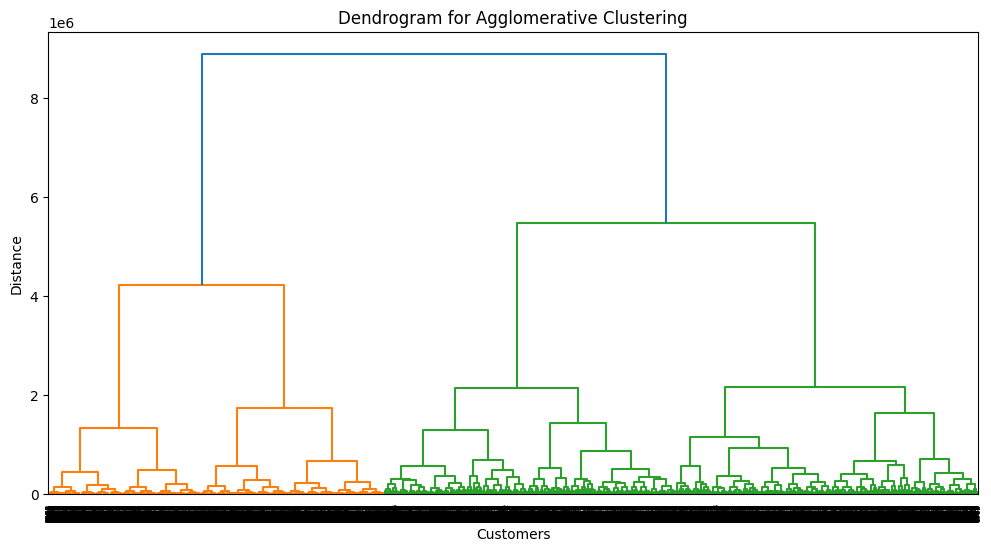

In [93]:
# Hierarchical Clustering - Dendrogram for why they leave the bank (reasons for churn)
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(x, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()